# Stitch Images to Video Using OpenCV

## Import Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp -r '/content/drive/My Drive/App/EVA/Session18/results' /content

In [0]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# read all images
def read_all_images(dir, filename_prefix, num_files):
  result_list = []
  for cnt in range(0, num_files):
    fn = filename_prefix + '_' + str(cnt) + '.png'
    full_path = os.path.join(dir, fn)
    img = cv2.imread(full_path)
    result_list.append(img)

  return result_list

In [0]:
original_frames = read_all_images('/content/results/original', 'frame', 153)

In [0]:
aligned_frames = read_all_images('/content/results/align_faces', 'align_face', 153)

In [0]:
stabilized_frames = read_all_images('/content/results/stab_frames', 'stab_frame', 153)

In [19]:
print(original_frames[0].shape)
print(aligned_frames[0].shape)
print(stabilized_frames[0].shape)

(540, 960, 3)
(600, 600, 3)
(540, 960, 3)


## Resize images

In [0]:
def resize_images(imageList, width, height):
  result_list = []
  for cnt in range(0, len(imageList)):
    new_img = cv2.resize(imageList[cnt], (width, height), interpolation=cv2.INTER_AREA)
    result_list.append(new_img)
  return result_list

In [24]:
len(original_frames)

153

In [0]:
orig_frames_resized = resize_images(original_frames, 600, 600)

In [26]:
orig_frames_resized[0].shape

(600, 600, 3)

In [0]:
stab_frames_resized = resize_images(stabilized_frames, 600, 600)

In [28]:
stab_frames_resized[0].shape

(600, 600, 3)

In [0]:
stitched_frames = []
for cnt in range(0, len(orig_frames_resized)):
  new_img = np.hstack((orig_frames_resized[cnt], aligned_frames[cnt], stab_frames_resized[cnt]))
  stitched_frames.append(new_img)

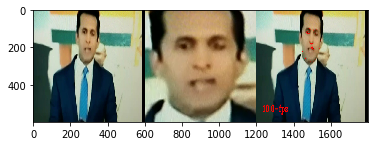

In [34]:
plt.imshow(stitched_frames[50][:,:,::-1])

## Save Stiched Images

In [0]:
# save all images to disk
def save_all_images(path, filename, imageList):
  for cnt in range(0, len(imageList)):
    temp_fn = filename + '_' + str(cnt) + '.png'
    fn = os.path.join(path) + os.path.join(temp_fn)
    cv2.imwrite(fn, imageList[cnt])

In [0]:
os.mkdir('/content/StitchedImages')

In [0]:
save_all_images('/content/StitchedImages/', 'stitch', stitched_frames)

In [0]:
!cp -r '/content/StitchedImages' '/content/drive/My Drive/App/EVA/Session18'

## Create Video

In [37]:
stitched_frames[0].shape

(600, 1800, 3)

In [0]:
?cv2.VideoWriter

In [0]:
fps = 30
size = (stitched_frames[0].shape[0], stitched_frames[0].shape[1])
out = cv2.VideoWriter('project.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, size )

In [0]:
for cnt in range(0, len(stitched_frames)):
  out.write(stitched_frames[cnt])
out.release()

In [0]:
!cp '/content/project.avi' '/content/drive/My Drive/App/EVA/Session18'

## Create Video in MP4 format

In [0]:
#mp4_out = cv2.VideoWriter('project.mp4', cv2.VideoWriter_fourcc(*'MP4V'), 15, size)

mp4_out = cv2.VideoWriter('project.mp4', cv2.VideoWriter_fourcc('F','M','P','4'), 15, size)
#cv2.VideoWriter_fourcc('F','M','P','4')


In [60]:
len(stitched_frames)

153

In [0]:
for cnt in range(0, len(stitched_frames)):
  mp4_out.write(stitched_frames[cnt])
  
mp4_out.release()

In [0]:
!cp '/content/project.mp4' '/content/drive/My Drive/App/EVA/Session18'